<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-PotterSR/blob/main/Sep8-9/Tarea9Sep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import scienceplots
plt.style.use(['science', 'no-latex'])

In [ ]:
!pip install scienceplots

# Data de Pokemon

In [5]:
data_frame = pd.read_csv('/content/drive/MyDrive/Data/Pokemon.csv')

In [6]:
data_frame.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [46]:
Xh = data_frame[['HP', 'Attack', 'Defense', 'Speed']]

Xh = Xh.to_numpy()

yh = data_frame['Total'].to_numpy()

label = ['HP', 'Attack', 'Defense', 'Speed']

Xh.shape

(800, 4)

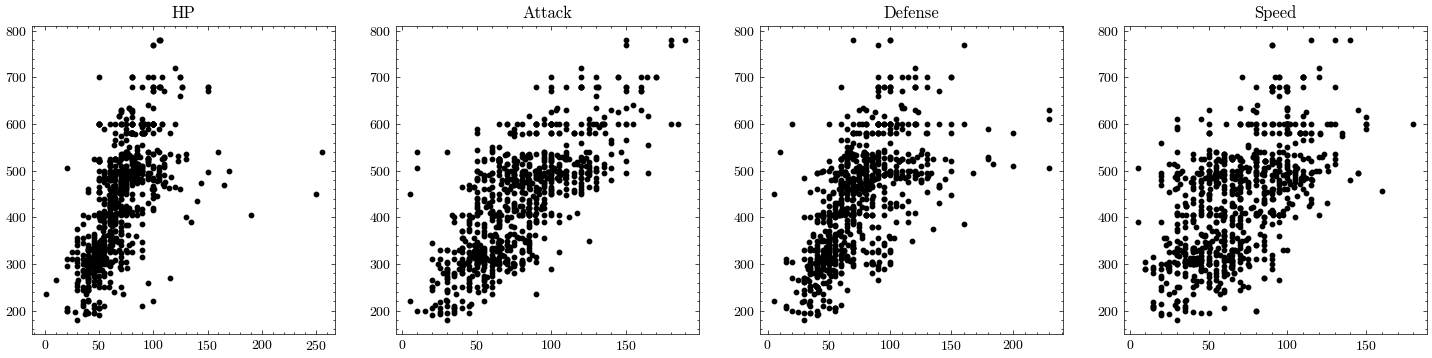

In [52]:
fig, ax = plt.subplots(1, 4, figsize = (18, 4))

for i in range(Xh.shape[1]):
  ax[i].scatter(Xh[:, i], yh, color = 'black', s=10)
  ax[i].set_title(label[i])

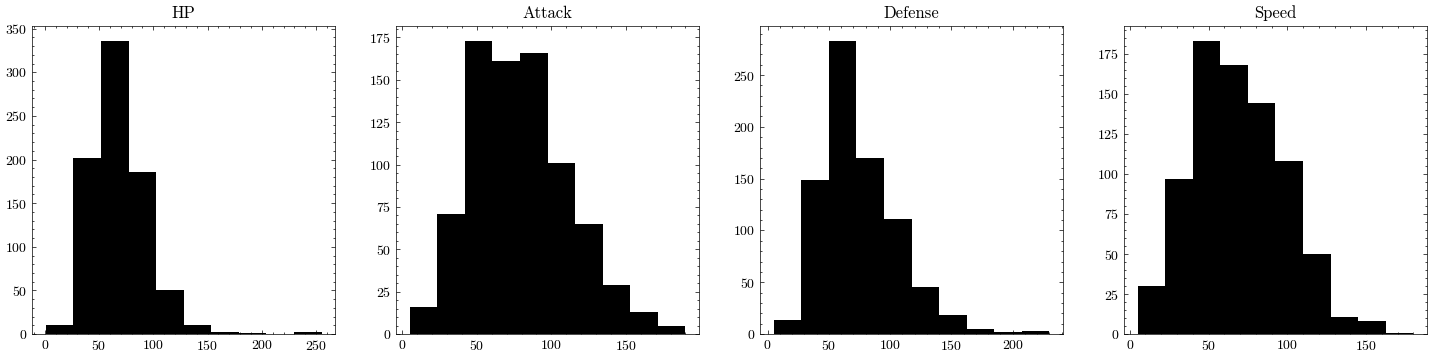

In [53]:
fig, ax = plt.subplots(1, 4, figsize = (18, 4))

for i in range(Xh.shape[1]):
  ax[i].hist(Xh[:, i], color = 'black')
  ax[i].set_title(label[i])

In [54]:
scaler = StandardScaler()

Xh_norm = scaler.fit_transform(Xh)

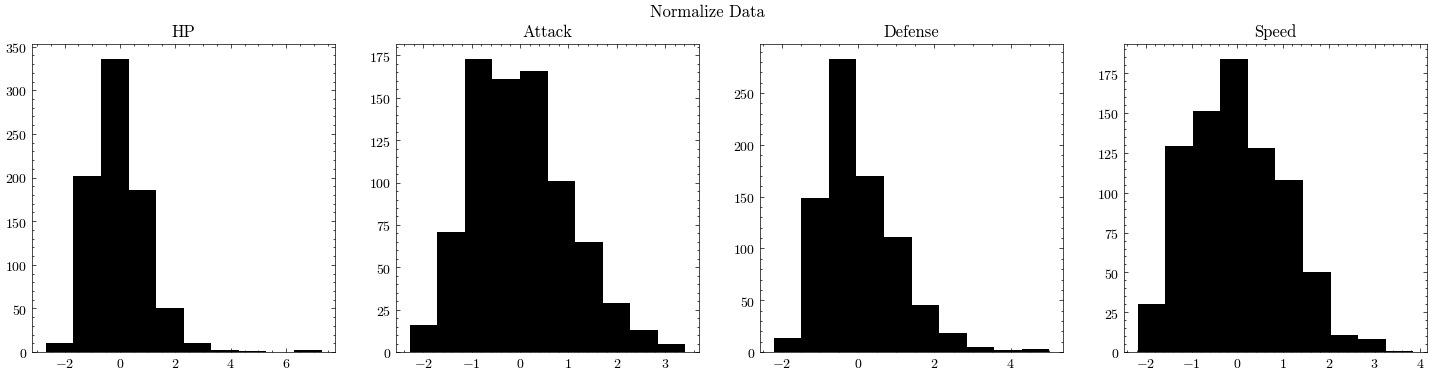

In [56]:
fig, ax = plt.subplots(1, 4, figsize = (18, 4))

fig.suptitle('Normalize Data')
for i in range(Xh_norm.shape[1]):
  ax[i].hist(Xh_norm[:, i], color = 'black')
  ax[i].set_title(label[i])

In [57]:
sgdr = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01)
sgdr.fit(Xh_norm, yh)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

number of iterations completed: 20, number of weight updates: 16001.0


In [62]:
w0 = sgdr.intercept_
ws = sgdr.coef_

ws

array([36.11310052, 29.71800687, 46.95493704, 49.88021547])

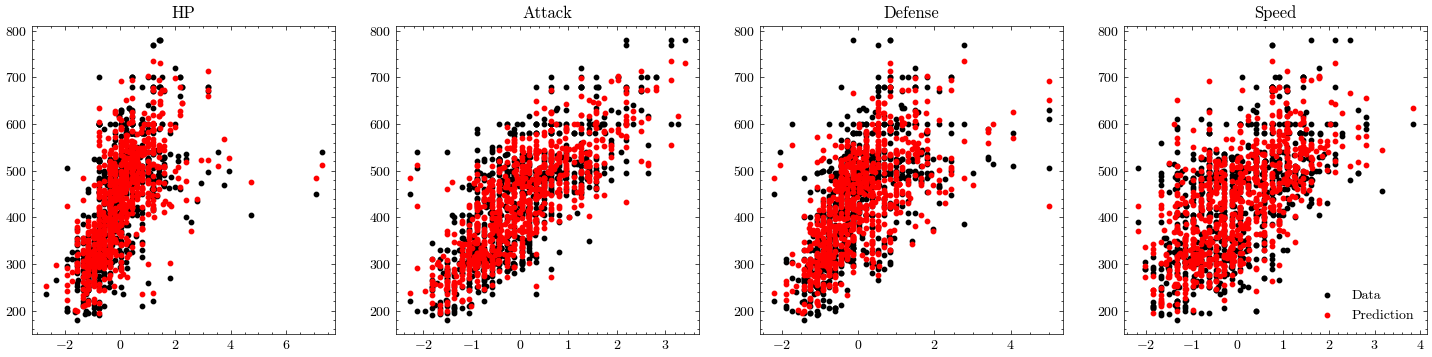

In [75]:
yp = w0[0]

for i in range(Xh_norm.shape[1]):
  yp += Xh_norm[:,i]*ws[i]


fig, ax = plt.subplots(1, 4, figsize = (18, 4))

for i in range(Xh.shape[1]):
  ax[i].scatter(Xh_norm[:, i], yh, color = 'black', s=10, label = 'Data')
  ax[i].scatter(Xh_norm[:, i], yp, color = 'red', s=10, label = 'Prediction')
  ax[i].set_title(label[i])

ax[3].legend(loc = 4);

Ahora dividimos el dataset en dos:
- Data Train
- Data Test

In [105]:
X_train, X_test, y_train, y_test = train_test_split(Xh_norm, yh, test_size=0.30, random_state=42)

In [106]:
sgdr = SGDRegressor(max_iter=100, loss="squared_error",learning_rate='constant', eta0=0.01,penalty=None)
sgdr.fit(X_train, y_train)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

number of iterations completed: 13, number of weight updates: 7281.0


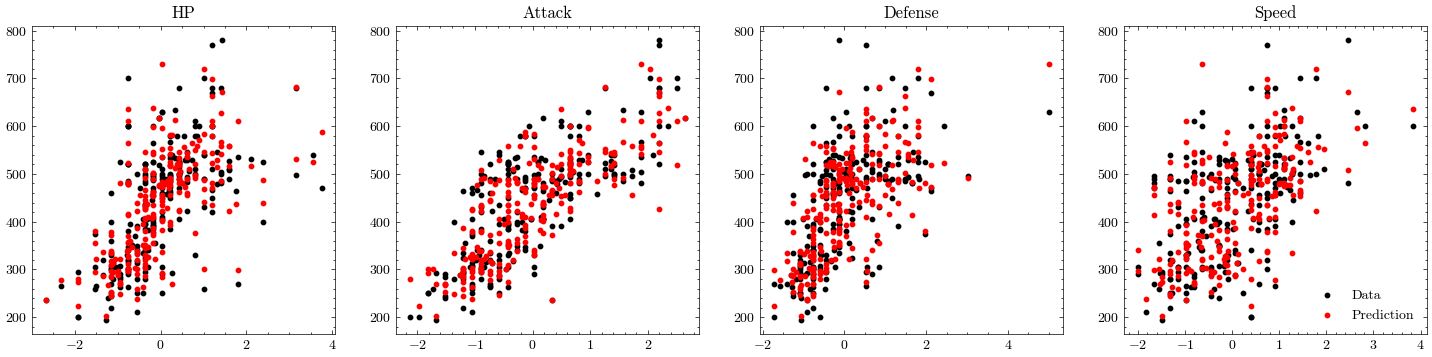

In [109]:
w0_norm = sgdr.intercept_
w_norm = sgdr.coef_

#predict target using normalized features
yp = w0_norm[0]
for i in range(len(w_norm)):
  yp+=w_norm[i]*X_test[:,i]


fig, ax = plt.subplots(1, 4, figsize = (18, 4))


for i in range(X_test.shape[1]):
  ax[i].scatter(X_test[:, i], y_test, color = 'black', s=10, label = 'Data')
  ax[i].scatter(X_test[:, i], yp, color = 'red', s=10, label = 'Prediction')
  ax[i].set_title(label[i])

ax[3].legend(loc = 4);



In [110]:
sgdr.score(X_test, y_test)

0.8670799381461408

#Usando Keras

In [111]:
#Usando KERAS
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

np.random.seed(2)
model = Sequential()

In [112]:
input_dim = 4
output_dim = 1
model.add(Dense(output_dim, input_dim=input_dim, activation='linear'))
sgd = SGD(learning_rate=0.01)
model.compile(loss='mse', optimizer=sgd)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [123]:
num_epochs = 100
batch_size =X_train.shape[0]
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
1/1 [==============================] - 0s 9ms/step - loss: 1585.0270
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 1582.7207
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 1580.5105
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 1578.3915
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 1576.3589
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 1574.4083
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 1572.5355
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 1570.7368
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 1569.0082
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 1567.3459
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 1565.7474
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 1564.2091
Epoch 13/100
1/1 [======

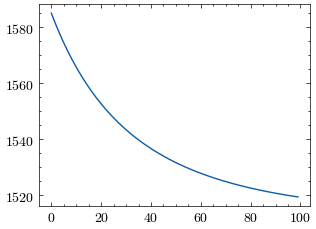

In [138]:
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

In [124]:
capas = model.layers[0]

w, s = capas.get_weights()


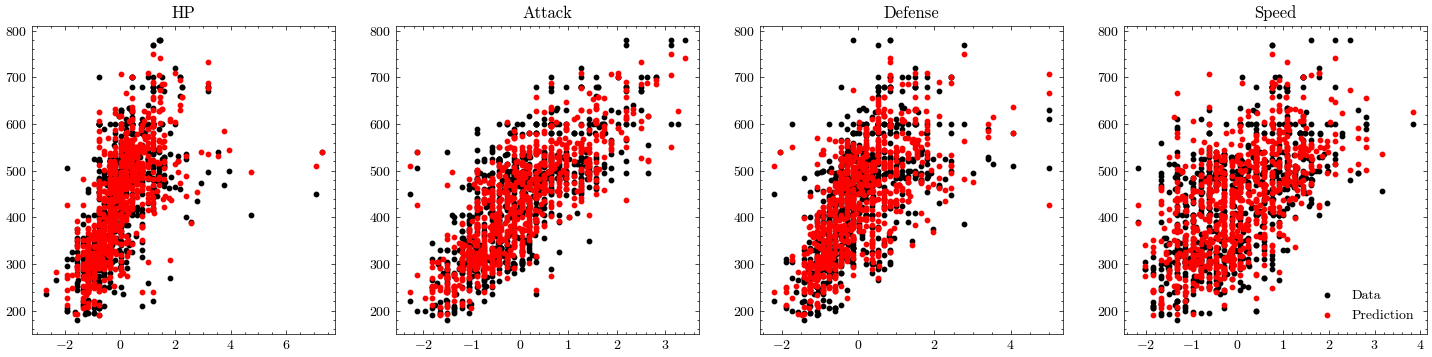

In [125]:
yp = s[0]

for i in range(Xh_norm.shape[1]):
  yp += Xh_norm[:,i]*w[i]


fig, ax = plt.subplots(1, 4, figsize = (18, 4))

for i in range(Xh.shape[1]):
  ax[i].scatter(Xh_norm[:, i], yh, color = 'black', s=10, label = 'Data')
  ax[i].scatter(Xh_norm[:, i], yp, color = 'red', s=10, label = 'Prediction')
  ax[i].set_title(label[i])

ax[3].legend(loc = 4);

Ahora entrenamos para los datos divididos

In [142]:
history2 = model.fit(X_test, y_test, epochs=num_epochs, batch_size=batch_size, verbose=1,
                     validation_data = (X_test, y_test))

Epoch 1/100
1/1 [==============================] - 0s 302ms/step - loss: 1765.4799 - val_loss: 1765.4797
Epoch 2/100
1/1 [==============================] - 0s 88ms/step - loss: 1765.4800 - val_loss: 1765.4794
Epoch 3/100
1/1 [==============================] - 0s 96ms/step - loss: 1765.4794 - val_loss: 1765.4791
Epoch 4/100
1/1 [==============================] - 0s 100ms/step - loss: 1765.4791 - val_loss: 1765.4789
Epoch 5/100
1/1 [==============================] - 0s 106ms/step - loss: 1765.4789 - val_loss: 1765.4786
Epoch 6/100
1/1 [==============================] - 0s 111ms/step - loss: 1765.4788 - val_loss: 1765.4788
Epoch 7/100
1/1 [==============================] - 0s 62ms/step - loss: 1765.4788 - val_loss: 1765.4784
Epoch 8/100
1/1 [==============================] - 0s 63ms/step - loss: 1765.4784 - val_loss: 1765.4783
Epoch 9/100
1/1 [==============================] - 0s 52ms/step - loss: 1765.4783 - val_loss: 1765.4784
Epoch 10/100
1/1 [==============================] - 0s 56ms/

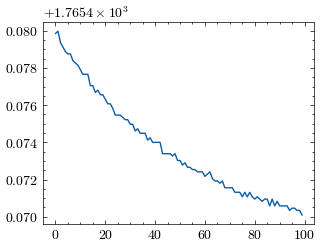

In [143]:
history_df = pd.DataFrame(history2.history)
# use Pandas native plot method
history_df['loss'].plot();

In [144]:
capas = model.layers[0]

w, s = capas.get_weights()

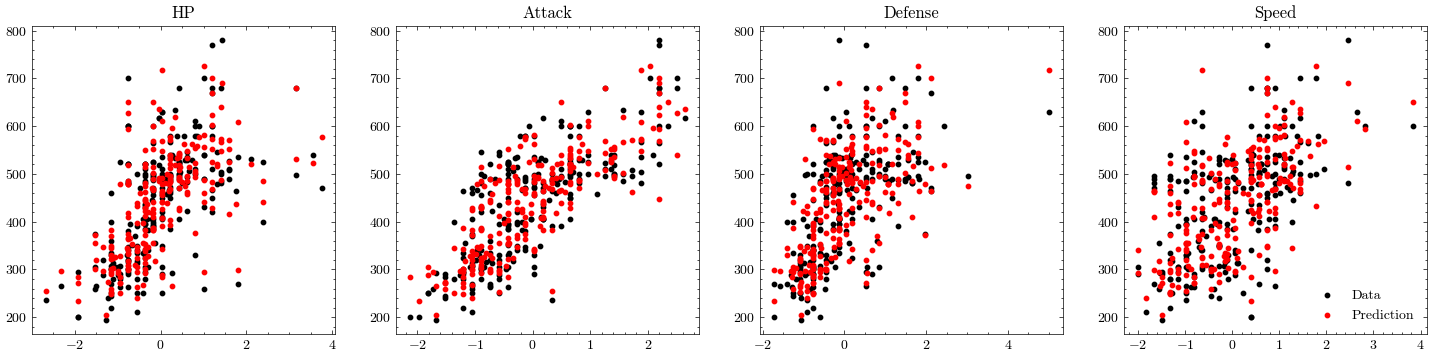

In [145]:
yp = s[0]

for i in range(Xh_norm.shape[1]):
  yp += X_test[:,i]*w[i]


fig, ax = plt.subplots(1, 4, figsize = (18, 4))

for i in range(Xh.shape[1]):
  ax[i].scatter(X_test[:, i], y_test, color = 'black', s=10, label = 'Data')
  ax[i].scatter(X_test[:, i], yp, color = 'red', s=10, label = 'Prediction')
  ax[i].set_title(label[i])

ax[3].legend(loc = 4);